In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
data_frame_train = pd.read_csv('BBC News Train.csv')
data_frame_test = pd.read_csv('BBC News Test.csv')

In [20]:
data_frame_train.shape

(1490, 3)

In [21]:
data_frame_test.shape

(735, 2)

In [22]:
data_frame_train

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [23]:
data_frame_test

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [24]:
data_frame_train.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [25]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [26]:
data_frame_train['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

ExplorataryTesting

In [27]:
data_frame_test.isnull().any()##Checkthenullvaluesindataset

ArticleId    False
Text         False
dtype: bool

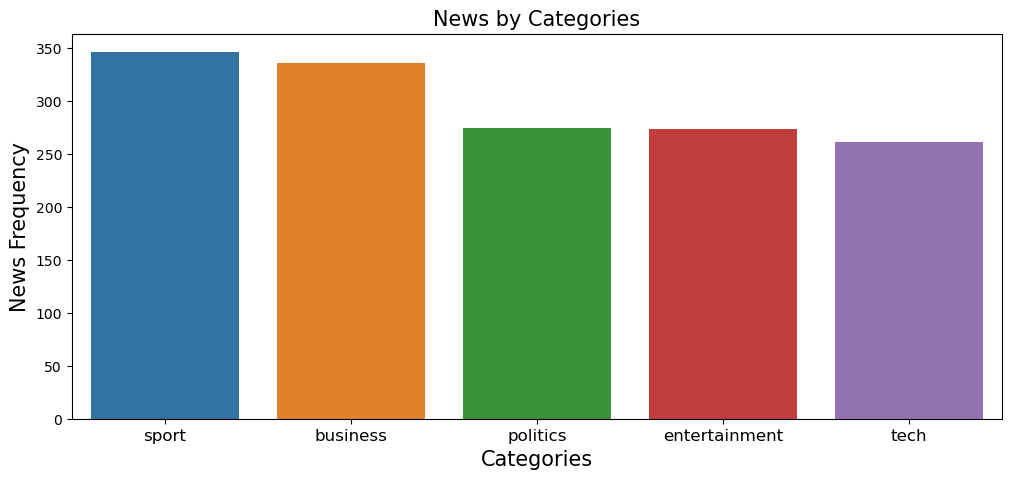

In [28]:
category_count = data_frame_train['Category'].value_counts()
categories = category_count.index
fig = plt.figure(figsize=(12,5))
ax= fig.add_subplot(111)
sns.barplot(x=category_count.index, y = category_count)
plt.xlabel('Categories', size = 15)
plt.ylabel('News Frequency', size = 15)
plt.xticks(size=12)
plt.title('News by Categories', size =15)
plt.show()


In [29]:
import re # Regular Expression
# Test Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from  nltk.stem import WordNetLemmatizer
def preprocessing(sentence):
    ##Lower Case
  sentence = sentence.lower()
  ## Correction of Sentenc
  sentence = re.sub(r"n\'t", " not", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'s", " is", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'t", " not", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'m", " am", sentence)
  sentence = re.sub(r"wont", "will not", sentence)
  sentence = re.sub(r"wouldnt", "would not", sentence)
  sentence = re.sub(r"shouldnt", "should not", sentence)
  sentence = re.sub(r"couldnt", "could not", sentence)
  sentence = re.sub(r"cudnt", "could not", sentence)
  sentence = re.sub(r"cant", "can not", sentence)
  sentence = re.sub(r"dont", "do not", sentence)
  sentence = re.sub(r"doesnt", "does not", sentence)
  sentence = re.sub(r"didnt", "did not", sentence)
  sentence = re.sub(r"wasnt", "was not", sentence)
  sentence = re.sub(r"werent", "were not", sentence)
  sentence = re.sub(r"havent", "have not", sentence)
  sentence = re.sub(r"hadnt", "had not", sentence)
  sentence = re.sub(r"ain't", "am not",sentence)
  sentence = re.sub(r"aren't", "are not",sentence)
  sentence = re.sub(r"can't", "cannot",sentence)
  sentence = re.sub(r"can't've", "cannot have",sentence)
  sentence = re.sub(r"'cause", "because",sentence)
  sentence = re.sub(r"could've", "could have",sentence)
  sentence = re.sub(r"couldn't", "could not",sentence)
  sentence = re.sub(r"couldn't've", "could not have",sentence)
  sentence = re.sub(r"didn't", "did not",sentence)
  sentence = re.sub(r"doesn't", "does not",sentence)
  sentence = re.sub(r"don't", "do not",sentence)
  sentence = re.sub(r"hadn't", "had not",sentence)
  sentence = re.sub(r"hadn't've", "had not have",sentence)
  sentence = re.sub(r"hasn't", "has not",sentence)
  sentence = re.sub(r"haven't", "have not",sentence)
  sentence = re.sub(r"he'd", "he would",sentence)
  sentence = re.sub(r"he'd've", "he would have",sentence)
  sentence = re.sub(r"he'll", "he will",sentence)
  sentence = re.sub(r"he'll've", "he will have",sentence)
  sentence = re.sub(r"he's", "he is",sentence)
  sentence = re.sub(r"how'd", "how did",sentence)
  sentence = re.sub(r"how'd'y", "how do you",sentence)
  sentence = re.sub(r"how'll", "how will",sentence)
  sentence = re.sub(r"how's", "how is",sentence)
  sentence = re.sub(r"i'd", "I would",sentence)
  sentence = re.sub(r"i'd've", "I would have",sentence)
  sentence = re.sub(r"i'll", "I will",sentence)
  sentence = re.sub(r"i'll've", "I will have",sentence)
  sentence = re.sub(r"i'm", "I am",sentence)
  sentence = re.sub(r"i've", "I have",sentence)
  sentence = re.sub(r"isn't", "is not",sentence)
  sentence = re.sub(r"it'd", "it had",sentence)
  sentence = re.sub(r"it'd've", "it would have",sentence)
  sentence = re.sub(r"it'll", "it will",sentence)
  sentence = re.sub(r"it'll've", "it will have",sentence)
  sentence = re.sub(r"it's", "it is",sentence)
  sentence = re.sub(r"let's", "let us",sentence)
  sentence = re.sub(r"ma'am", "madam",sentence)
  sentence = re.sub(r"mayn't", "may not",sentence)
  sentence = re.sub(r"might've", "might have",sentence)
  sentence = re.sub(r"mightn't", "might not",sentence)
  sentence = re.sub(r"mightn't've", "might not have",sentence)
  sentence = re.sub(r"must've", "must have",sentence)
  sentence = re.sub(r"mustn't", "must not",sentence)
  sentence = re.sub(r"mustn't've", "must not have",sentence)
  sentence = re.sub(r"needn't", "need not",sentence)
  sentence = re.sub(r"needn't've", "need not have",sentence)
  sentence = re.sub(r"o'clock", "of the clock",sentence)
  sentence = re.sub(r"oughtn't", "ought not",sentence)
  sentence = re.sub(r"oughtn't've", "ought not have",sentence)
  sentence = re.sub(r"shan't", "shall not",sentence)
  sentence = re.sub(r"sha'n't", "shall not",sentence)
  sentence = re.sub(r"shan't've", "shall not have",sentence)
  sentence = re.sub(r"she'd", "she would",sentence)
  sentence = re.sub(r"she'd've", "she would have",sentence)
  sentence = re.sub(r"she'll", "she will",sentence)
  sentence = re.sub(r"she'll've", "she will have",sentence)
  sentence = re.sub(r"she's", "she is",sentence)
  sentence = re.sub(r"should've", "should have",sentence)
  sentence = re.sub(r"shouldn't", "should not",sentence)
  sentence = re.sub(r"shouldn't've", "should not have",sentence)
  sentence = re.sub(r"so've", "so have",sentence)
  sentence = re.sub(r"so's", "so is",sentence)
  sentence = re.sub(r"that'd", "that would",sentence)
  sentence = re.sub(r"that'd've", "that would have",sentence)
  sentence = re.sub(r"that's", "that is",sentence)
  sentence = re.sub(r"there'd", "there had",sentence)
  sentence = re.sub(r"there'd've", "there would have",sentence)
  sentence = re.sub(r"there's", "there is",sentence)
  sentence = re.sub(r"they'd", "they would",sentence)
  sentence = re.sub(r"they'd've", "they would have",sentence)
  sentence = re.sub(r"they'll", "they will",sentence)
  sentence = re.sub(r"they'll've", "they will have",sentence)
  sentence = re.sub(r"they're", "they are",sentence)
  sentence = re.sub(r"they've", "they have",sentence)
  sentence = re.sub(r"to've", "to have",sentence)
  sentence = re.sub(r"wasn't", "was not",sentence)
  sentence = re.sub(r"we'd", "we had",sentence)
  sentence = re.sub(r"we'd've", "we would have",sentence)
  sentence = re.sub(r"we'll", "we will",sentence)
  sentence = re.sub(r"we'll've", "we will have",sentence)
  sentence = re.sub(r"we're", "we are",sentence)
  sentence = re.sub(r"we've", "we have",sentence)
  sentence = re.sub(r"weren't", "were not",sentence)
  sentence = re.sub(r"what'll", "what will",sentence)
  sentence = re.sub(r"what'll've", "what will have",sentence)
  sentence = re.sub(r"what're", "what are",sentence)
  sentence = re.sub(r"what's", "what is",sentence)
  sentence = re.sub(r"what've", "what have",sentence)
  sentence = re.sub(r"when's", "when is",sentence)
  sentence = re.sub(r"when've", "when have",sentence)
  sentence = re.sub(r"where'd", "where did",sentence)
  sentence = re.sub(r"where's", "where is",sentence)
  sentence = re.sub(r"where've", "where have",sentence)
  sentence = re.sub(r"who'll", "who will",sentence)
  sentence = re.sub(r"who'll've", "who will have",sentence)
  sentence = re.sub(r"who's", "who is",sentence)
  sentence = re.sub(r"who've", "who have",sentence)
  sentence = re.sub(r"why's", "why is",sentence)
  sentence = re.sub(r"why've", "why have",sentence)
  sentence = re.sub(r"will've", "will have",sentence)
  sentence = re.sub(r"won't", "will not",sentence)
  sentence = re.sub(r"won't've", "will not have",sentence)
  sentence = re.sub(r"would've", "would have",sentence)
  sentence = re.sub(r"wouldn't", "would not",sentence)
  sentence = re.sub(r"wouldn't've", "would not have",sentence)
  sentence = re.sub(r"y'all", "you all",sentence)
  sentence = re.sub(r"y'alls", "you alls",sentence)
  sentence = re.sub(r"y'all'd", "you all would",sentence)
  sentence = re.sub(r"y'all'd've", "you all would have",sentence)
  sentence = re.sub(r"y'all're", "you all are",sentence)
  sentence = re.sub(r"y'all've", "you all have",sentence)
  sentence = re.sub(r"you'd", "you had",sentence)
  sentence = re.sub(r"you'd've", "you would have",sentence)
  sentence = re.sub(r"you'll", "you you will",sentence)
  sentence = re.sub(r"you'll've", "you you will have",sentence)
  sentence = re.sub(r"you're", "you are",sentence)
  sentence = re.sub(r"you've", "you have",sentence)
  ## Remove Punctuation
  sentence = re.sub(r'[^\w\s]','',sentence)
  ## Remove Html Tag
  cleaner = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1-6});')

  sentence = re.sub(cleaner, '',sentence)


  ## Remove Digit

  sentence = re.sub(r'[^A-za-z]',' ',sentence)
  sentence = re.sub(r'[\w._%+-]{1-20}@[\w.-]{1,20}.[A-Za-z]{2,3}','', sentence)
  ## Remove URL

  re.sub(r'https?s:\/\/.*','',sentence)
  ## stopwords
  sentence = " ".join(item for item in sentence.split() if item not in stopwords.words('english'))

  ## Stemmer Change the synonyms to base word  Its convert based on vocal liky Studies convert to Studi
  ##sentence = ' '.join([PorterStemmer().stem(word) for word in sentence.split()])

  ## Lemmatization   Also covert the word to base word studies to study
  sentence = ' '.join([WordNetLemmatizer().lemmatize(word) for word in sentence.split()])
  return sentence


In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parde\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
data_frame_train['Token'] = data_frame_train['Text'].apply(lambda sentence : preprocessing(sentence))

In [ ]:
data_frame_train.head()

,ArticleId,Text,Category,Token
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defence lawyer defendin...
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizen majo...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...


In [34]:
X = data_frame_train.Token
Y = data_frame_train.Category


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)


In [37]:
print(x_train.shape,y_train.shape)

(1192,) (1192,)


In [38]:
print(x_test.shape,y_test.shape)

(298,) (298,)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
## Term - Frequency- Inverse Document Frequency

# t = term (word), d = docuement (page), D = Corpus (File)

# IDF(t,d) = log(N/(1+DF(t)))

# TF(t,d) = number of times t (word) appears in d (document) / total number of terms in d (document)

# N = total number of documents, DF(t) = Number of documents containing the term t. 

# TF_IDF(t,d,D) = Tf(t,d) * IDF (t,D)  Important Formula

## Will cover more state-of_art (text preprocessing ) techniques while using Deep Learning.

from nltk.tokenize import RegexpTokenizer


In [41]:
token = RegexpTokenizer(r'[a-zA-z0-9]+')
Tfidf_Vectorizer =  TfidfVectorizer(tokenizer=token.tokenize)
Tfidf_Vectorizer

TfidfVectorizer(tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)

In [43]:
X_Train_Transformed = Tfidf_Vectorizer.fit_transform(x_train)

In [44]:
X_Train_Transformed

<1192x20566 sparse matrix of type '<class 'numpy.float64'>'
	with 173940 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.preprocessing import LabelEncoder
label_fit = LabelEncoder()
label_fit.fit(Y)
y_train_transformed = label_fit.fit_transform(y_train)
y_test_transformed  = label_fit.fit_transform(y_test)
print(label_fit.classes_)


['business' 'entertainment' 'politics' 'sport' 'tech']


In [48]:
integer_mapping = {l:i for i,l in enumerate(label_fit.classes_)}
integer_mapping

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

## Naive Bayes

In [ ]:
## Implement Multinomial Bayes

from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB,CategoricalNB
model_MNB = MultinomialNB()
X_train_dense = X_Train_Transformed.toarray()

model_MNB.fit(X_train_dense,y_train_transformed)
X_test_dense = Tfidf_Vectorizer.transform(x_test).toarray()
Y_predicted_MNB = model_MNB.predict(X_test_dense)
print("Predicted Labels :", Y_predicted_MNB)



Predicted Labels : [1 2 2 2 3 0 4 1 0 4 2 1 0 3 4 2 0 3 2 0 4 1 3 0 3 4 0 3 4 0 3 0 0 2 3 4 2
 0 1 0 3 0 2 0 3 0 2 4 2 0 3 3 0 3 2 1 1 2 0 1 4 0 2 4 4 4 0 4 2 2 2 3 3 3
 1 1 0 2 0 0 0 3 3 3 0 1 3 0 0 4 1 0 2 4 0 2 4 4 1 2 1 2 1 3 4 3 2 3 0 4 4
 0 4 1 4 0 2 0 1 0 2 3 0 2 0 0 4 4 2 1 0 3 1 3 0 2 0 1 0 1 0 1 4 3 1 2 0 4
 2 0 3 0 4 3 1 4 4 3 4 3 3 2 0 4 2 2 4 3 3 4 2 4 4 1 0 4 1 3 0 0 3 3 4 1 1
 0 4 2 1 2 3 3 2 4 3 3 2 3 3 0 1 2 3 1 0 3 4 4 0 0 3 2 0 1 3 2 2 3 4 2 3 4
 0 0 1 4 0 2 2 2 2 3 3 0 0 4 0 3 3 2 2 1 1 1 0 0 1 1 3 1 3 2 4 3 2 4 1 3 4
 0 0 2 4 4 4 3 3 0 2 1 3 3 4 3 3 2 3 3 0 2 1 0 0 2 0 0 0 4 2 1 0 0 0 0 2 1
 4 1]


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
def plot_matrix(y_test,y_pred, color="Greens"):
    labels = np.unique(y_pred)
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred), index=labels,columns = labels)
    sns.heatmap(cm_df, annot= True, fmt='g',cmap=color)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

Average accuracy on test set=0.9697986577181208
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.98      1.00      0.99        45
           2       0.95      0.91      0.93        58
           3       1.00      0.97      0.98        65
           4       0.93      1.00      0.96        54

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



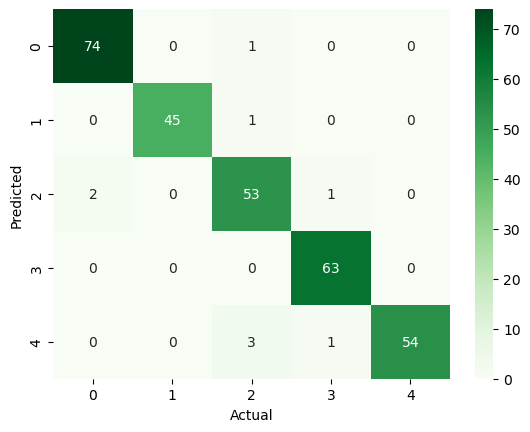

In [56]:
print('Average accuracy on test set={}'.format(np.mean(Y_predicted_MNB == label_fit.transform(y_test))))
print(classification_report(Y_predicted_MNB,y_test_transformed))
plot_matrix(y_test_transformed, Y_predicted_MNB)